# Семинар 1: введение в Tensorflow

Фрэймворком для обучения нейросеток на нашем курсе будет Tensorflow. Чтобы установить библиотеку, отправляйтесь в консоль и пропишите 

```
pip install tensorflow 
```

Мы будем использовать вторую версию. Если вы до этого сидели на старой версии tensorflow, на всякий случай снесите её. Иначе при установке могут возникнуть какие-нибудь несовместимости и ошибки.

In [7]:
import numpy as np
np.__version__

'1.19.4'

In [8]:
import tensorflow as tf
tf.__version__ 

'2.5.0'

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [9]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [10]:
%%timeit
N = 10**8
np_sum_squares(N)

1.21 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tensorflow из-за того, что мы сначала задаём структуру вычислений, а после осуществляем их, работает быстрее.

In [11]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [12]:
%%timeit
N = 10**8
tf_sum_squares(N)

795 ms ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Более того, когда вы уже задали свой граф вычислений и убедились, что всё работает, можно вызвать декоратор `tf.function`. [Он сделает работу заданного графа](https://www.tensorflow.org/tutorials/customization/performance) более оптимальной и ещё сильнее ускорит код. 

In [15]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [14]:
%%timeit
N = 10**8
tf_sum_squares(N)

226 µs ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для тяжелых рассчетов.

# 1. Тензоры и базовые операции над ними

Основной объект в tensorflow - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, tensorflow косплеит numpy. 

```
    np.zeros -> tf.zeros
    np.sin -> tf.sin
    np.mean -> tf.reduce_mean
    np.arange -> tf.range
    np.cumsum -> tf.cumsum
```

Правда говоря, не совсем косплеит. Но чаще всего оказываетс довольно близок.

In [9]:
# можно задать тензор из нулей
tf.zeros([3, 4])

<tf.Tensor: id=105, shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [10]:
# или из единиц, но уже более сложной размерности
tf.ones([3, 4, 2])

<tf.Tensor: id=108, shape=(3, 4, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [11]:
# можно сгенерировать тензор из нормального распределения
tf.random.normal([2,2])

<tf.Tensor: id=114, shape=(2, 2), dtype=float32, numpy=
array([[-1.7302257 , -0.00920664],
       [-0.27910614,  1.0234534 ]], dtype=float32)>

In [12]:
# можно просто сделать залифку тензора какими-то числами
tf.fill([2, 2], 0.5)

<tf.Tensor: id=117, shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

In [13]:
# можно создать матрицу в numpy
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [14]:
# а потом перевести её в тензор
tf.convert_to_tensor(x, tf.float32) 

<tf.Tensor: id=118, shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [15]:
# или можно просто сразу создать тензор 
tf.constant([[1,  2,  3,  4],
             [5,  6,  7,  8],
             [9, 10, 11, 12]])

<tf.Tensor: id=119, shape=(3, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]], dtype=int32)>

In [16]:
# наверное, стоит уточнить тип данных в тензоре
x = tf.constant([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]], dtype=tf.float32)

Все срезы, операции, размерности работают как в numpy.

In [17]:
x.dtype

tf.float32

In [18]:
x.shape

TensorShape([3, 4])

In [19]:
x[0]

<tf.Tensor: id=124, shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [20]:
x[:,1]

<tf.Tensor: id=128, shape=(3,), dtype=float32, numpy=array([ 2.,  6., 10.], dtype=float32)>

In [21]:
x + 10

<tf.Tensor: id=130, shape=(3, 4), dtype=float32, numpy=
array([[11., 12., 13., 14.],
       [15., 16., 17., 18.],
       [19., 20., 21., 22.]], dtype=float32)>

In [22]:
x[x > 3]

<tf.Tensor: id=159, shape=(9,), dtype=float32, numpy=array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>

In [23]:
y = tf.constant([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]], dtype=tf.float32)

In [24]:
x + y

<tf.Tensor: id=161, shape=(3, 4), dtype=float32, numpy=
array([[13., 13., 13., 13.],
       [13., 13., 13., 13.],
       [13., 13., 13., 13.]], dtype=float32)>

In [25]:
x**y

<tf.Tensor: id=162, shape=(3, 4), dtype=float32, numpy=
array([[1.00000e+00, 2.04800e+03, 5.90490e+04, 2.62144e+05],
       [3.90625e+05, 2.79936e+05, 1.17649e+05, 3.27680e+04],
       [6.56100e+03, 1.00000e+03, 1.21000e+02, 1.20000e+01]],
      dtype=float32)>

In [26]:
tf.math.exp(x)

<tf.Tensor: id=163, shape=(3, 4), dtype=float32, numpy=
array([[2.7182817e+00, 7.3890562e+00, 2.0085537e+01, 5.4598152e+01],
       [1.4841316e+02, 4.0342880e+02, 1.0966332e+03, 2.9809580e+03],
       [8.1030840e+03, 2.2026465e+04, 5.9874141e+04, 1.6275480e+05]],
      dtype=float32)>

In [27]:
# Когда надоело работать с тензором, можно вернуться назад в numpy формат
x.numpy() 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

In [16]:
# тип у тензоров может быть разный, но всегда один
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

### Задание 1:

Попробуйте реализовать на tensorflow сигмоиду. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [17]:
## Ответ: 
x = tf.linspace(-1.,1.,10)

sigma = 1 / (1 + tf.exp(-x))
sigma

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.26894143, 0.314799  , 0.36457646, 0.41742983, 0.47225076,
       0.52774924, 0.5825702 , 0.6354236 , 0.685201  , 0.7310586 ],
      dtype=float32)>

### Задание 2:

Попробуйте реализовать на tensorflow среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2
$$

In [18]:
## Ответ: 
y_true = tf.constant([1,2,3,4,5])
y_predicted = tf.constant([5,4,3,2,1])

mse = tf.reduce_mean((y_true - y_predicted)**2)
mse

<tf.Tensor: shape=(), dtype=int32, numpy=8>

------------------------------------------

# 2. Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Для этого используется [`GradientTape.`](https://www.tensorflow.org/tutorials/customization/autodiff)

Он проходит по всем операциям, которые фигурируют в графе, и применяет к ним chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Мы можем посчитать производную по любому тензору, участвующему в вычислениях.

In [19]:
x = tf.constant([0.3, 1])

# опция persistent=True позволяет искать производную много раз, а не один
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = y**2

In [20]:
t.gradient(z, x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6, 2.6], dtype=float32)>

In [21]:
t.gradient(z, y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6>

Нарисуем функцию и её производную на картинке :) 

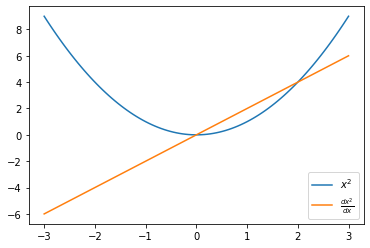

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

x = tf.linspace(-3., 3., 100)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x**2

dy_dx = t.gradient(y, x)

plt.plot(x, y, label="$x^2$")
plt.plot(x, dy_dx, label=r"$\frac{dx^2}{dx}$")
plt.legend();

### Задание 3:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [35]:
# Ответ: 
w = tf.constant([[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape( ) as t:
    t.watch(w)
    f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

df_dw = t.gradient(f, w)
df_dw.numpy()

W1002 23:13:10.663706 140735755330496 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:281: setdiff1d (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)

# 3. Переменные

Следущий важный объект в tensorflow это **переменная.** Она представляет из себя некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их используют для описания параметров модели

In [36]:
w = tf.Variable(initial_value=0.5)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>

In [37]:
x = np.array([1,2,3], dtype=float)
x

array([1., 2., 3.])

In [38]:
x*w

<tf.Tensor: id=396, shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

Более того, переменные хороши тем, что Tensorflow сразу же следит за ними при вычислении производных. Ему не надо указывать с помощью команды `watch`, за каким тензором нужно приглядывать. 

### Задание 4:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`. Отличие от предыдущей задачки такое: надо задать $w$ не как тензор, а как переменную. 

In [39]:
# Ответ: 
w = tf.Variable(initial_value=[[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape( ) as t:
    f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

df_dw = t.gradient(f, w)
df_dw.numpy()

array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)

------------------------------------------

# 4. Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

Попробуем решить глупую задачку по конвертации градусов по цельсию в градусы по фаренгейту. По данным будем пытаться восстановить формулу: 

$$ f = c \times 1.8 + 32 $$

In [40]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype='float32')
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype='float32')

for i,c in enumerate(celsius):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [41]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

a.numpy(), b.numpy()

(array([-0.35024723], dtype=float32), array([0.29618418], dtype=float32))

In [42]:
# Наша модель
def linear_regression(x):
    return a + b*x

# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

In [43]:
linear_regression(celsius).numpy()

array([-12.197615  ,  -3.312089  ,  -0.35024723,   2.0192263 ,
         4.0925155 ,   6.165805  ,  10.904752  ], dtype=float32)

In [44]:
mean_square(linear_regression(celsius), fahrenheit).numpy()

2762.9236

In [45]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [46]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))

step: 0, loss: 1022.360413, a: -0.271482, b: 2.281443
step: 100, loss: 679.016174, a: 5.362409, b: 2.022351
step: 200, loss: 462.308929, a: 10.012512, b: 1.983107
step: 300, loss: 314.769989, a: 13.849401, b: 1.950727
step: 400, loss: 214.322342, a: 17.015293, b: 1.924009
step: 500, loss: 145.935501, a: 19.627523, b: 1.901963
step: 600, loss: 99.376137, a: 21.782932, b: 1.883773
step: 700, loss: 67.677536, a: 23.561401, b: 1.868764
step: 800, loss: 46.096516, a: 25.028843, b: 1.856380
step: 900, loss: 31.403570, a: 26.239666, b: 1.846162
step: 1000, loss: 21.400347, a: 27.238737, b: 1.837730
step: 1100, loss: 14.589875, a: 28.063097, b: 1.830773
step: 1200, loss: 9.953258, a: 28.743279, b: 1.825033
step: 1300, loss: 6.796551, a: 29.304508, b: 1.820297
step: 1400, loss: 4.647361, a: 29.767595, b: 1.816388
step: 1500, loss: 3.184126, a: 30.149704, b: 1.813164
step: 1600, loss: 2.187945, a: 30.464983, b: 1.810503
step: 1700, loss: 1.509721, a: 30.725126, b: 1.808307
step: 1800, loss: 1.04

Можно сделать то же самое, но с визуализацией. 

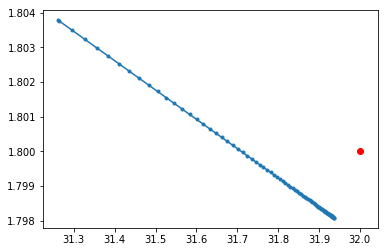

In [47]:
from IPython.display import clear_output

epochs = 2000 # число эпох 

ass = [a.numpy()[0]] # стартовые точки 
bss = [b.numpy()[0]] 

for i in range(epochs):
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    if i%25 == 0:
        # Пополняем запас точек 
        ass.append(a.numpy()[0])
        bss.append(b.numpy()[0])

        clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
        plt.plot(ass, bss, marker='.')
        plt.scatter(32, 1.8, c='red')
        plt.show()

### Задание 5:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [48]:
#Ответ:
w = tf.Variable(initial_value=tf.random.normal([2,2]))

# добавили, чтобы проиллюстрировать комент про матричное диффириенцирование
#v = tf.Variable(initial_value=tf.random.normal([2,2])) 

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

def find_min():
    # градиент 
    with tf.GradientTape( ) as t:
        f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))# + v)
        
    # Вычисляем градиенты
    gradients = t.gradient(f, [w])#, v]) # СПИСОК МАТРИЦ, у нас тут матричное диффириенцирование
    
    print(gradients, '\n') # на них даже можно посмотреть :) 
    optimizer.apply_gradients(zip(gradients, [w]))#, v]))
    pass

find_min()

[<tf.Tensor: id=165015, shape=(2, 2), dtype=float32, numpy=
array([[0.01817186, 0.02705098],
       [0.01554612, 0.02445397]], dtype=float32)>] 



In [49]:
w = tf.Variable(initial_value=[[5., 10.], [1., 2.]])

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=1e-3)

def find_min():
    # градиент 
    with tf.GradientTape( ) as t:
        f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))
        
    # Вычисляем градиенты
    gradients = t.gradient(f, [w]) # СПИСОК МАТРИЦ, у нас тут матричное диффириенцирование
    
    optimizer.apply_gradients(zip(gradients, [w]))
    pass


for i in range(500):
    find_min()
    if i % 100 == 0:
        print(w.numpy(), '\n')

[[4.99998   9.9999895]
 [0.9999551 1.999965 ]] 

[[4.9979773 9.99894  ]
 [0.9954669 1.9964602]] 

[[4.9959745  9.997891  ]
 [0.99097866 1.9929554 ]] 

[[4.993972   9.996842  ]
 [0.98648703 1.9894507 ]] 

[[4.991969   9.995793  ]
 [0.98199284 1.9859426 ]] 



------------------------------------------

# 5. Моя первая нейросеть 

Для того, чтобы разобраться как обучать нейросити, нужно освоить три вещи: 

1. Как обрабатывать поток данных и пихать его в сетку
2. Как сделать сетку
3. Как написать цикл обучения

Раньше все учили свою первую нейросеть на [наборе рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/) Теперь это не модно. Если где-то кто-то будет проводить у вас семинар с участием этого датасета, так и скажите ему: __это не модно!__  Хлопать дверью или нет --- на ваше усмотрение. 

На арене туториалов новый король: [Fashion MNIST.](https://www.tensorflow.org/tutorials/keras/classification) По ссылке лежит туториал с строительством нейросетки на этом наборе, но с участием Keras. Мы пока что обойдёмся без него.


### 5.0 Данные

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Нарисуем несколько рандомных картинок из тренировочной выборки. 

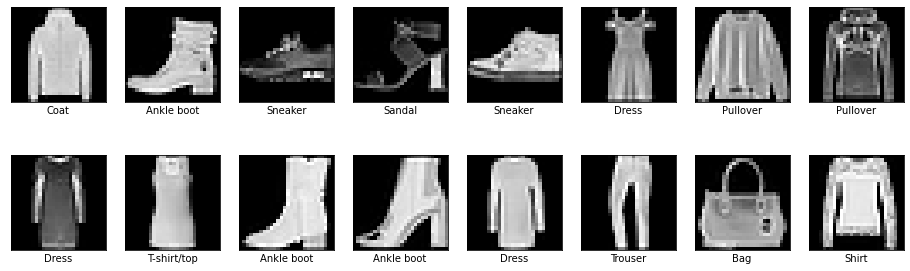

In [26]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный. Яркость измеряется по шкале от $0$ до $255$.

In [27]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Картинка - матрица. 

In [29]:
X_train[0].shape

(28, 28)

Давайте отнормируем выборку. 

In [30]:
X_train = X_train/255
X_test = X_test/255

Будем прогнозировать тип картинки по её пикселям. Давайте растянем её в вектор из $28 \times 28$ фичей.

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28**2)
X_test = X_test.reshape(X_test.shape[0], 28**2)
X_train.shape

(60000, 784)

Поставим для данных тип, чтобы ничего не поломалось.

In [32]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## 5.1 Обработка потока данных

Чтобы в tensorflow эффективно итерироваться по данным и применять к ним различные преобразования, о которых вы узнает позже - нужно [создать из них `Dataset`](https://www.tensorflow.org/guide/data?hl=ur)

In [35]:
x = [8, 3, 0, 8, 2, 1]

dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

`Dataset` это итератор. Когда мы будем работать с большими данными, мы будем писать на его основе итераторы, которые будут считывать данные прямо с компьютера и после использования выкидывать их из оперативной памяти.

In [34]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


У датасетов есть много интересных методов. Например, в них можно перемешивать данные и разбивать их на батчи. 

In [45]:
x = [8, 3, 0, 8, 2, 1]
y = [1, 0, 1, 1, 0, 1]

# создали объект с данными для обучения 
dataset = tf.data.Dataset.from_tensor_slices((x, y))

# перемешали данные с окном в 10 и сделали кучу батчей размера 2 
dataset = dataset.shuffle(10).batch(2)

In [46]:
for item,jtem in dataset:
    print(item.numpy(),jtem.numpy())

[8 1] [1 1]
[2 0] [0 1]
[8 3] [1 0]


Для первого раза этих двух преобразований нам будет достаточно.

### Задание 6:

Напишите итератор для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла. 

In [48]:
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(10000)
    .batch(32)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(32)
)

## 5.2 Нейронная сеть

Собирать нейронную сеть в tensorflow можно разными способами. Давайте посмотрим на три разных.

__Способ 1:__ для того, чтобы в hight-level tensorflow создавать нейросети, обычно используют класс `Model`. Например, это можно сделать следующим образом.

In [55]:
from tensorflow.keras import Model, layers

# Объявляем как должна будет выглядеть модель
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = layers.Dense(64, activation='relu')
        self.d2 = layers.Dense(32, activation='relu')
        self.d3 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

# создаём один экземпляр модели
model = MyModel()
model

In [57]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.16410393, 0.1114145 , 0.13782363, 0.04656859, 0.05004575,
        0.13062406, 0.07967811, 0.05443279, 0.1958743 , 0.02943432],
       [0.15116197, 0.11840604, 0.09985363, 0.04464563, 0.05257433,
        0.2224722 , 0.0752366 , 0.05028408, 0.15912814, 0.02623744],
       [0.1201308 , 0.11421257, 0.10605907, 0.063504  , 0.07754103,
        0.17846091, 0.08003809, 0.0677607 , 0.1245511 , 0.06774174]],
      dtype=float32)>

Как мы видим на данном примере, у данного класса должно быть метод `call`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `keras.layers` содержит в себе реализацию большинства слоев.

Если вы не очень поняли, что произошло, не пугайтесь. На следующем семинаре мы более подробно поговорим про объектно-ориентированное программирование и научимся писать подобные модели. 

__Способ 2:__ Можно собрать модель с помощью класса `Sequential`. В его рамках сбор модели будет выглядить как строительство башни из конструктора LEGO. Модель описывается последовательно. Мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки. 

In [66]:
from tensorflow.keras import Sequential, layers

model = Sequential()                             # создали контейнер для модели
model.add(layers.Dense(64))                      # слой из 64 нейронов
model.add(layers.Activation('relu'))             # функция активации
model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
model.add(layers.Dense(10))                      # выход из сетки
model.add(layers.Activation('softmax'))

In [67]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.18391237, 0.0962125 , 0.02662289, 0.08799534, 0.17348199,
        0.02442268, 0.17744966, 0.1366415 , 0.01673638, 0.07652473],
       [0.06601667, 0.16544464, 0.09378423, 0.11857451, 0.10744199,
        0.01133136, 0.24354368, 0.06920417, 0.03917283, 0.08548585],
       [0.08657976, 0.13362747, 0.11384644, 0.13884495, 0.10094742,
        0.03911621, 0.12922415, 0.10172085, 0.06704777, 0.08904501]],
      dtype=float32)>

__Способ 3:__ Описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою. 

In [68]:
a = layers.Input(shape=(X_train.shape[1],))  # Первая заглушка для входа 
b = layers.Dense(64)(a)                      # Применяем ко входу полносвязный слой как функцию
b = layers.Activation('relu')(b)             # Теперь к тому, что получилось функцию активации
b = layers.Dropout(0.5)(b)                   # Ну и так далее... 
b = layers.Dense(10, activation='relu')(b)   # Функции активации можно звать по-разному

model = Model(inputs=a, outputs=b)    # указываем что вход, а что выход, склеивая модель

In [69]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.        , 0.378788  , 0.05307394, 0.1461952 , 0.        ,
        0.        , 1.4395455 , 0.31224597, 0.        , 0.        ],
       [0.        , 1.6361241 , 2.062097  , 0.        , 0.        ,
        0.6524271 , 1.4426876 , 0.2620902 , 0.        , 0.92801636],
       [0.        , 0.67248356, 0.71629083, 0.        , 0.        ,
        0.2389422 , 0.40926498, 0.0998861 , 0.        , 0.20610535]],
      dtype=float32)>

### Задание 7:

Способом, который вам больше всего понравился, напишите нейросеть из трёх полносвязных слоёв размеров $128, 64, 32$ с сигмоидой в качестве функции активации. После каждого слоя сделайте дропаут с вероятностью $0.2$. Выходной слой должен состоять из $10$ нейронов с `Softmax` в качестве функции активации, так как мы решаем задачу классификации $10$ классов. 

In [ ]:
# ваш код

## 5.3 функция потерь и цикл для обучения

Посмотрим сколько параметров нам предстоит оценить. 

In [ ]:
model.summary() # для 1 способа эта команда не сработает

In [77]:
# Список из весов модели (хранятся как матрицы)
len(model.trainable_variables)

4

Подгрузим какой-нибудь оптимизатор, который будет делать для нас градиентный спуск. 

In [89]:
learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

Подгрузим из пакета функцию потерь. Её можно было бы написать самостоятельно по аналогии с тем, как мы это сделали для градусов по фарингейту.

In [95]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.




In [96]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

### Задание 8: 

Напишите функцию, которая делает один шаг обучения модели. 

In [97]:
@tf.function
def train_step(images, labels):
    
    # находим loss и пробрасываем градиент
    with tf.GradientTape() as t:
        predictions = model(images, training=True)
        loss = loss_function(labels, predictions)
        
        # training=True нужно указывать если у нас в выборке есть 
        # слои с разным поведением в трэйне и тесте (например дропаут)
        # в чём отличе обсудим позже на лекциях
        
    # Вычисляем градиенты и обновляем веса
    gradients = t.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # запоминаем получившееся значение loss
    train_loss(loss)

Напишем функцию, которая будет делать один шаг тестирования модели. 

In [98]:
@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    loss = loss_function(labels, predictions)
    test_loss(loss)

In [101]:
# Работает ли?
train_step(X_train, y_train)

In [102]:
train_loss.result()

<tf.Tensor: shape=(), dtype=float32, numpy=9.329781>

Запускаем обучение.

In [103]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Сброс метрик перед стартом новой эпохи
    train_loss.reset_states()
    test_loss.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Test Loss: {test_loss.result()}, '
    )

Epoch 1, Loss: 2.5610485076904297, Test Loss: 1.2697157859802246, 
Epoch 2, Loss: 1.639914870262146, Test Loss: 1.096735954284668, 
Epoch 3, Loss: 1.5246284008026123, Test Loss: 1.0595016479492188, 
Epoch 4, Loss: 1.4433804750442505, Test Loss: 1.0853590965270996, 
Epoch 5, Loss: 1.3843539953231812, Test Loss: 0.9501239657402039, 


### Задание 9: 

С помощью `tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')` добавьте в обучение отслеживание точности модели на тестовой и тренировочной выборках.  

## 5.4 метод .fit

Можно обучать модели намного проще. Это позволяет сделать метод  `fit` позволяет сделать это. Он принимает на вход обучающую выборку `X_train, y_train`. Параметр  `batch_size` это  размер батча. Этот параметр ограничивает количество примеров, которое за раз подаётся в нашу нейронную сеть. Количиство эпох для обучения, `epochs` - это число проходов модели по обучающей выборке. 

Обычно нейросетки обучаются довольно долго. В связи с этим обучать их на различных фолдах и оценивать качество работы модели на кросс-валидации не очень быстрое занятие, которое себе может позволить далеко не каждый. Для проверки качества обычно внутри обучения с помощью параметра `validation_split` часть выборки оставляют под валидацию, которая осуществляется после каждой эпохи. Как только качество на валидации начнёт падать, это будет означать, что модель переобучилаcь. 

Всё, что будет нам возвращать метод `.fit`, мы запишем в переменную `hist`. После обученя модели там окажется вся история ошибок на каждом шаге обучения. Отключить сообщения о том, на каком этапе обучения в данный момент находится модель, можно с параметром `verbose = 0`. Переменную $y$ для успешного обучения сетки нужно будет перевести в матрицу из дамми-переменных с помощью команды `to_categorical`. 

In [105]:
from tensorflow.keras import Sequential, layers

model = Sequential()                             # создали контейнер для модели
model.add(layers.Dense(64))                      # слой из 64 нейронов
model.add(layers.Activation('relu'))             # функция активации
model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
model.add(layers.Dense(10))                      # выход из сетки
model.add(layers.Activation('softmax'))

learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss = loss_function, 
              metrics=["accuracy"], 
              optimizer=optimizer)

Обучаем модель через `.fit`.

In [107]:
hist = model.fit(X_train, 
                 y_train,
                 validation_split=0.2,
                 epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5508 - accuracy: 0.8127 - val_loss: 0.4498 - val_accuracy: 0.8396
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5325 - accuracy: 0.8183 - val_loss: 0.4355 - val_accuracy: 0.8424
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5168 - accuracy: 0.8239 - val_loss: 0.4270 - val_accuracy: 0.8472
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5049 - accuracy: 0.8278 - val_loss: 0.4208 - val_accuracy: 0.8466
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4930 - accuracy: 0.8282 - val_loss: 0.4102 - val_accuracy: 0.8515
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4800 - accuracy: 0.8338 - val_loss: 0.4036 - val_accuracy: 0.8529
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4728 - accuracy: 0.8356 - val_loss: 0.3994 - val_accuracy:

Возвращает этот метод history — это история ошибок на каждом шаге обучения. Посмотрим на динамику ошибок нашей модели во времени. 

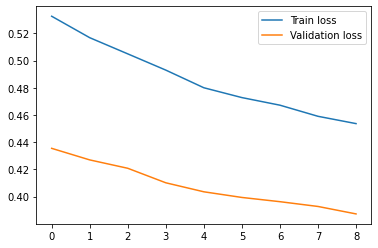

In [108]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [109]:
# Можно предсказать вероятности для тестовой выборки
model.predict_proba(X_test)

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[2.98677901e-06, 3.16539115e-07, 1.17648215e-05, ...,
        1.13453351e-01, 1.06115139e-03, 8.15918148e-01],
       [2.97077604e-05, 4.31610125e-09, 9.78441000e-01, ...,
        8.42251963e-12, 3.64445185e-07, 8.08455841e-13],
       [8.40957853e-07, 9.99994755e-01, 6.35388517e-07, ...,
        1.16787552e-11, 3.79447779e-10, 4.65855783e-12],
       ...,
       [1.02618821e-02, 3.43376939e-07, 7.48741790e-04, ...,
        3.56279998e-05, 9.69926238e-01, 3.70449766e-06],
       [5.91751177e-06, 9.99352872e-01, 2.24418000e-06, ...,
        8.33043323e-09, 4.84682694e-08, 6.44831921e-09],
       [6.57556302e-05, 4.71597014e-06, 2.01691757e-04, ...,
        6.92260787e-02, 4.19767248e-03, 3.62139707e-03]], dtype=float32)

In [110]:
# А можно классы 
model.predict_classes(X_test)

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5])

In [112]:
# Можно найти logloss 
loss_function(y_test,model.predict_proba(X_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.4143878>

In [114]:
# Можно посмотреть на качество модели по всем указанным при коммпиляции метрикам. 
score = model.evaluate(X_test, y_test, verbose=0)
score 

[0.41459783911705017, 0.8486999869346619]

Этот способ учить модели более простой, но менее универсальный. В будущем мы увидим довольно много ограничений, которые на нас накладывает такой подход.

# N+1. Как Tensorflow работал раньше 

Больше такой код не надо писать никогда и нигде. Если видите его в туториалах в интернете, сразу закрывайте их. Эти туториалы устарели. Можете попробовать подуть на них (сдуть слой пыли), а дальше попробовать самостоятельно переписать старый код на новый. Это неплохое упражнение :) 

In [ ]:
import tensorflow.compat.v1 as tf  # подгружаем первую версию библиотеки 
tf.disable_v2_behavior()           # отключаем функционал второй 
                                   # теперь код, написанный на версии tf 1.x должен работать 
tf.__version__

Раньше сначала надо было задать структуру вычислений с помощью тензоров. 

In [ ]:
# что происходило в первой версии 
a = tf.constant([1, 2])
b = tf.constant([3, 4])

print(a + b)

Результат на лету было увидеть нельзя. 

In [ ]:
c = a + b
с

Если хотелось результата, надо было запускать вычислительную сессию, которая прогоняла все данные через граф.

In [ ]:
# открываем вычислительную сессию 
with tf.Session() as sess:
    print(sess.run(с))

In [ ]:
# либо можно было открыть глобальную сессию 
sess = tf.InteractiveSession()
c.eval()

Процедура обучения модели выглядела раньше иначе. Кроме переменных в обучении участие принимал ещё один объект, `placeholder`. 

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные

In [ ]:
epochs = 10

# плейсхолдеры для данных 
# "Я обещаю вставить сюда x и y позже"
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# параметры модели 
a = tf.Variable(tf.zeros([1]), name='bias')
b = tf.Variable(tf.zeros([1]), name='k')

# модель 
y_hat = b*x + a

# функция потерь и метод оптимизации
loss = tf.sqrt(tf.reduce_sum((y - y_hat)**2))
opt = tf.train.AdamOptimizer(learning_rate = 0.1)

# из-за того, что не было динамических вычислений, 
# было проще с градиентами
step = opt.minimize(loss)

# Но зато было сложнее с процедурой обучения, надо было запускать ... сессии
# открываем вычислительную сессию 
with tf.Session() as sess:
    
    # инициализировали все переменные 
    tf.global_variables_initializer().run() 
    
    for i in range(epochs):
        
        # Дорогая сессия, вычисли мне результат функции потерь, пожалуйста! Вот тебе конкретные x и y! 
        cur_loss = sess.run(loss, feed_dict={x:celsius, y:fahrenheit})
        print('Текущие потери:', cur_loss)
        
        # шаг оптимизации 
        sess.run(step, feed_dict={x:celsius, y:fahrenheit})
        
    print('\nКоэффициенты:', a.eval()[0], b.eval()[0])
    print('Прогнозы:', sess.run(y_hat, feed_dict={x:[-40,0,38]}))

## Почиташки

* [Эффективный tensorflow 2.0](https://www.tensorflow.org/guide/effective_tf2)
* [Простые примеры кода на tensorflow 2.0](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2)
* [Очень-очень милая презентация про fashion mnist](https://github.com/fbchow/fashion-mnist-tensorflow/blob/master/ml-fashion-mnist-presentation.pdf)


__Немного старья:__

* [Введение в старую версию Tensorflow на Хабре](https://habrahabr.ru/company/ods/blog/324898/)
* [Введение в старый Tensorflow от ШАД,](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) моя тетрадка частично основана на этой тетрадке, хоть сходство на первый взгляд и не заметно. 
* [Неплохая подборка разных тетрадок](https://github.com/Hvass-Labs/TensorFlow-Tutorials) на разном tensorflow